# Implementation of KRR, Logistic Regression and SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn import preprocessing
from sklearn.kernel_ridge import KernelRidge
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix

C:\Users\jagpa\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\jagpa\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
data = np.genfromtxt('C:/Users/jagpa/ML/ML_Exam/classsification/classification_data2.txt')
data = pd.DataFrame(data,index=data[:,0],columns=['area','perimeter','compactness','kernel_length','kernel_width','asym','groove_length','type'])

# Summary statistics of data

In [3]:
data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15.26,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
14.88,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
14.29,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
13.84,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0


**Dropping row**

Data contains missing values. These values cause errors while handling the data further.I'm dropping row containing missing values (NaN) using dropna() function and then resetting the index.

In [4]:
#taking care of missing values
data=data.dropna()
data=data.reset_index()

In [5]:
data.head()

,index,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
0,15.26,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
index            210 non-null float64
area             210 non-null float64
perimeter        210 non-null float64
compactness      210 non-null float64
kernel_length    210 non-null float64
kernel_width     210 non-null float64
asym             210 non-null float64
groove_length    210 non-null float64
type             210 non-null float64
dtypes: float64(9)
memory usage: 14.8 KB


In [7]:
data.describe()

,index,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


**Separating data into Features (X) and Target(y).**

In [8]:
X = data.drop(['type'],axis=1).values
y = data['type'].values

# Plotting all the attributes

Principal Component Analysis (PCA) does the analysis of data to identify patterns and finding patterns to reduce the dimensions of thedataset with minimal loss of information. Here I'm using PCA to covert attributes into 2-dimensions and plot all of them.

**Scatter Plot**

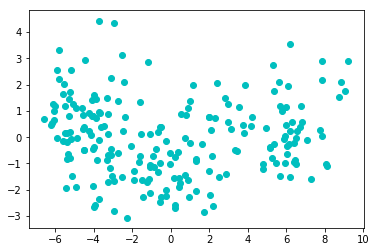

In [9]:
cmp_pca = PCA(n_components=2) # 2 PCA components;
arr_pca = cmp_pca.fit_transform(X)
plt.scatter(arr_pca[:,0],arr_pca[:,1],c='C')
plt.show()

**Histogram**

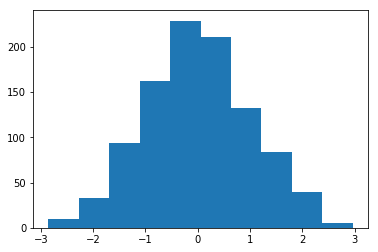

In [10]:
from numpy.random import normal
arr_pca = normal(size=1000)
plt.hist(arr_pca)
plt.show()

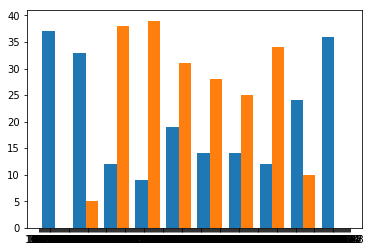

In [11]:
q = pd.concat([data['area'], data['perimeter']], axis =1)
plt.hist(q)
plt.show()

# Correlation Matrix

correlation values between attribute columns are shown belown in Correlation Matrix.

In [12]:
#Correlation between values
data2 = data.drop('type',axis=1)
corr_mx = data2.corr()
corr_mx

,index,area,perimeter,compactness,kernel_length,kernel_width,asym,groove_length
index,1.000000,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
area,1.000000,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
perimeter,0.994341,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
compactness,0.608288,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
kernel_length,0.949985,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
kernel_width,0.970771,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
asym,-0.229572,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
groove_length,0.863693,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


# Train Test Split

I'm splitting dataset into training and testing set by 80% i.e. 80% train set and 20% test set. Training set contains a known output and model learns on trained data in order to be generalized to other data. 

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)
print('Shape of training data')
print(X_train.shape)
print('Shape of testing data')
print(X_test.shape)

Shape of training data
(168, 8)
Shape of testing data
(42, 8)


# **Logistic Regression Model**

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. Logistic regression builds on the basic formula for linear regression (a), simplified to (b), which produces a predicted target value for an input vector.

(a)    y(x) = w0+ w1Φ(x1) + ... + wnΦ(xn)

(b)    y(x) = w'(x)

In [14]:
LogisticRegressionModel = linear_model.LogisticRegression()
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
LogisticRegScore = LogisticRegressionModel.score(X_test,y_test)
print('Score on test data :',LogisticRegScore)

Score on test data : 0.97619047619


In [16]:
LogisticRegScoreTrain = LogisticRegressionModel.score(X_train,y_train)
print('Score on train data :',LogisticRegScoreTrain)

Score on train data : 0.916666666667


In [17]:
logistic_model_predictions = LogisticRegressionModel.predict(X_test)
logistic_error = confusion_matrix(y_true=y_test, y_pred=logistic_model_predictions, labels=None, sample_weight=None)
print('The Error of the Logistic Regression model is: ')
print(logistic_error)

The Error of the Logistic Regression model is: 
[[19  1  0]
 [ 0  9  0]
 [ 0  0 13]]


# Kernalized Ridge Regression

We use plain Ridge Regression to minimize L2-regularized least-square error. Kernelized Ridge Regression has the same objective, but use a substitution to rewrite the function in terms of ΦΦᵀ, so that predictions can be made without needing to compute ΦΦᵀ directly.
A few choices for the kernel are

(a)Linear / Identity Kernel : K(X,X’) = Xᵀ X

(b)Polynomial Kernel : K(X,X’) = (γ Xᵀ X + r)M 

(c)RBF / Gaussian Kernel : K(X,X’) = exp [ - (|| X - X’ ||2) / 2σ2 ]

**Cross-Validation** :
It is a model validation technique for evaluating how the outcomes of a statistical analysis will generalize to an independent data set. Mainly used in backgrounds where the objective is forecast and one wants to estimate how accurately a model will accomplish in practice. The goal of cross-validation is to term a data set to test the model in the training phase (i.e. validation data set) in order to limit problems like overfitting, and get an insight on how the model will generalize to an independent data set.


**GridSearchCV** :
Scikit-learn’s GridSearchCV performs k-fold cross validation and searches for a best parameters across a set of parameters. Here I'm using 5-fold cross validation for hyperparameter tuning.


**Linear Kernel**

In [18]:
KRR_linear=KernelRidge(kernel='linear', gamma=None, degree=None, coef0=1, kernel_params=None, alpha=1)
KRR_linear.fit(X_train,y_train)

KernelRidge(alpha=1, coef0=1, degree=None, gamma=None, kernel='linear',
      kernel_params=None)

In [19]:
y_pred=KRR_linear.predict(X_test)
y_pred

array([ 1.5052374 ,  3.14073854,  1.57054248,  2.20458318,  1.49524617,
        1.91870254,  1.23108423,  2.66643771,  2.04278533,  2.75370438,
        2.15481514,  0.86919645,  1.47553628,  0.67106418,  0.9470027 ,
        3.16372088,  3.04370507,  1.42631499,  1.72194126,  1.53784171,
        1.22473397,  1.34400707,  2.01128079,  2.69551771,  1.95456783,
        3.09660846,  1.24849069,  3.29396408,  1.79579404,  1.78274563,
        1.43869845,  1.79686211,  1.73526031,  1.40437377,  1.7818201 ,
        1.64951075,  2.74833338,  1.6937078 ,  1.44840879,  2.34297151,
        1.48728789,  2.63219737])

In [20]:
r2_error1 = r2_score(y_true=y_test, y_pred=y_pred)
print('R^2 error for linear kernel :',r2_error1)

R^2 error for linear kernel : 0.732248875723


In [21]:
print('Score on test data :',KRR_linear.score(X_test,y_test))

Score on test data : 0.732248875723


In [22]:
print('Score on train data :',KRR_linear.score(X_train,y_train))

Score on train data : 0.633851799365


**Polynomial Kernel**

In [23]:
KRR_polynomial= GridSearchCV(KernelRidge(kernel="polynomial", gamma=1, coef0=1), cv=5, param_grid={"degree":[2,3,4]})
KRR_polynomial.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=1, kernel='polynomial',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1, param_grid={'degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [24]:
y_pred=KRR_polynomial.predict(X_test)
y_pred

array([ 1.30962284,  3.37398694,  1.19752929,  2.30112428,  1.40606989,
        2.34539598,  0.88434143,  2.63532931,  2.05337793,  3.09396025,
        1.71956639,  0.93532035,  1.29781521,  0.84044922,  0.89421994,
        3.47443568,  3.41802903,  1.11331712,  1.40537408,  1.2598908 ,
        1.06911601,  1.07078225,  1.8849076 ,  2.9589795 ,  1.80618221,
        3.32336356,  1.06917497,  3.67395659,  1.48982066,  2.0504868 ,
        1.91584054,  2.18193851,  1.86543096,  1.09633405,  1.92404878,
        1.8874245 ,  2.86034932,  2.02407664,  1.19186227,  2.51715612,
        1.44643873,  2.62414818])

In [25]:
KRR_polynomial.best_score_

0.6898034275998355

In [26]:
KRR_polynomial.best_params_

{'degree': 2}

**Gaussian Kernel**

In [27]:
KRR_gaussian= GridSearchCV(KernelRidge(kernel="rbf"), cv=5, param_grid={"gamma":[ 0.1, 0.5, 1, 2, 4]})
KRR_gaussian.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='rbf',
      kernel_params=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.1, 0.5, 1, 2, 4]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=0)

In [28]:
y_pred=KRR_gaussian.predict(X_test)
y_pred

array([ 1.1882059 ,  2.34261009,  1.37249802,  2.6578105 ,  1.37423523,
        1.61320756,  0.99065665,  2.773754  ,  2.65243904,  3.03203517,
        1.90093714,  1.03978623,  1.13564109,  0.80124957,  1.57193623,
        2.9883227 ,  2.83332532,  1.00287919,  1.13317253,  1.09516972,
        1.12383935,  1.4008979 ,  1.96868677,  2.70966179,  1.33860893,
        3.21135868,  0.93285313,  2.91587875,  1.51862095,  2.03259141,
        1.96385096,  2.04401751,  1.72399749,  1.01358187,  1.52979076,
        1.90925269,  3.0384815 ,  1.31895557,  1.83640638,  2.61322975,
        2.27895566,  3.10389553])

In [29]:
KRR_gaussian.best_score_

0.6814936166898518

In [30]:
KRR_gaussian.best_params_

{'gamma': 0.1}

# SVM

**Hard Margin SVM using rbf kernel**

In [31]:
from sklearn import svm
hard_svm1 = svm.SVC(C =1e10,kernel="rbf",gamma =1.5,shrinking=False,cache_size=3000)
hard_svm1.fit(X_train,y_train)

SVC(C=10000000000.0, cache_size=3000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

In [32]:
y_pred= hard_svm1.predict(X_test)
print('y prediction :',y_pred)
print('Score on test set :',hard_svm1.score(X_test,y_test))
print('Score on train set :',hard_svm1.score(X_train,y_train))

y prediction : [ 1.  3.  1.  3.  1.  2.  1.  3.  3.  3.  2.  1.  1.  1.  1.  3.  3.  1.
  1.  1.  1.  2.  2.  3.  1.  3.  1.  3.  1.  2.  2.  2.  2.  1.  3.  2.
  3.  2.  3.  3.  3.  3.]
Score on test set : 0.904761904762
Score on train set : 1.0


In [33]:
y_pred=hard_svm1.predict(X_test)
svm_error = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=None, sample_weight=None)
print('The Error of the Logistic Regression model is: ')
print(svm_error)

The Error of the Logistic Regression model is: 
[[16  1  3]
 [ 0  9  0]
 [ 0  0 13]]


**Hard Margin SVM using linear kernel**

In [34]:
hard_svm2 = svm.SVC(C =100000,kernel="linear",gamma =1,shrinking=False,cache_size=3000)
hard_svm2.fit(X_train,y_train)

SVC(C=100000, cache_size=3000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

In [35]:
y_pred= hard_svm2.predict(X_test)
print('y prediction :',y_pred)
print('Score on test set :',hard_svm2.score(X_test,y_test))
print('Score on train set :',hard_svm2.score(X_train,y_train))

y prediction : [ 1.  3.  1.  3.  1.  2.  1.  3.  1.  3.  2.  1.  1.  1.  1.  3.  3.  1.
  1.  1.  1.  1.  2.  3.  1.  3.  1.  3.  1.  2.  2.  2.  2.  1.  1.  2.
  3.  2.  1.  3.  1.  3.]
Score on test set : 0.97619047619
Score on train set : 0.982142857143


In [36]:
svm_error2 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=None, sample_weight=None)
print('The Error of linear kernel is: ')
print(svm_error2)

The Error of linear kernel is: 
[[20  0  0]
 [ 0  9  0]
 [ 1  0 12]]


**Hard Margin SVM using polynomial kernel**

In [37]:
hard_svm3 = svm.SVC(C =10000,kernel="poly",gamma =1,shrinking=False,cache_size=3000)
hard_svm3.fit(X_train,y_train)

SVC(C=10000, cache_size=3000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=False,
  tol=0.001, verbose=False)

In [38]:
y_pred= hard_svm3.predict(X_test)
print('y prediction :',y_pred)
print('Score on test set :',hard_svm3.score(X_test,y_test))
print('Score on train set :',hard_svm3.score(X_train,y_train))

y prediction : [ 1.  3.  1.  3.  1.  2.  1.  3.  3.  3.  2.  1.  1.  1.  1.  3.  3.  1.
  1.  1.  1.  1.  2.  3.  1.  3.  1.  3.  1.  2.  2.  2.  2.  1.  3.  2.
  3.  2.  1.  3.  1.  3.]
Score on test set : 0.97619047619
Score on train set : 1.0


In [39]:
svm_error3 = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=None, sample_weight=None)
print('The Error of polynomial kernel is: ')
print(svm_error3)

The Error of polynomial kernel is: 
[[19  0  1]
 [ 0  9  0]
 [ 0  0 13]]


**Soft Margin SVM**

In [40]:
coef0 = [0.1, 0.5, 1, 2, 5]
for i in range(4) :
    soft_svm = svm.SVC(C = 1,coef0=coef0[i])
    soft_svm.fit(X_train,y_train)
    y_pred= soft_svm.predict(X_test)
    print('y prediction :',y_pred)
    print('score on test data for', coef0[i],':',soft_svm.score(X_test,y_test))
    print('score on train data for', coef0[i],':',soft_svm.score(X_train,y_train))
    conf_mx = confusion_matrix(y_test,y_pred)
    print('confusion_mx_error for',coef0[i])
    print(conf_mx)
    print('\n')

y prediction : [ 1.  3.  2.  3.  1.  2.  1.  3.  3.  3.  2.  1.  1.  1.  1.  3.  3.  1.
  1.  1.  1.  1.  2.  3.  1.  3.  1.  3.  1.  2.  2.  2.  2.  1.  1.  2.
  3.  2.  1.  3.  3.  3.]
score on test data for 0.1 : 0.952380952381
score on train data for 0.1 : 0.916666666667
confusion_mx_error for 0.1
[[18  1  1]
 [ 0  9  0]
 [ 0  0 13]]


y prediction : [ 1.  3.  2.  3.  1.  2.  1.  3.  3.  3.  2.  1.  1.  1.  1.  3.  3.  1.
  1.  1.  1.  1.  2.  3.  1.  3.  1.  3.  1.  2.  2.  2.  2.  1.  1.  2.
  3.  2.  1.  3.  3.  3.]
score on test data for 0.5 : 0.952380952381
score on train data for 0.5 : 0.916666666667
confusion_mx_error for 0.5
[[18  1  1]
 [ 0  9  0]
 [ 0  0 13]]


y prediction : [ 1.  3.  2.  3.  1.  2.  1.  3.  3.  3.  2.  1.  1.  1.  1.  3.  3.  1.
  1.  1.  1.  1.  2.  3.  1.  3.  1.  3.  1.  2.  2.  2.  2.  1.  1.  2.
  3.  2.  1.  3.  3.  3.]
score on test data for 1 : 0.952380952381
score on train data for 1 : 0.916666666667
confusion_mx_error for 1
[[18  1  1]
 [ 0  9

**Soft Margin SVM using cross validation(RBF)**

In [41]:
soft_svm2_rbf = svm.SVC()
soft_svm2_rbf = GridSearchCV(estimator=soft_svm2_rbf, param_grid={'kernel': ['rbf'], 'C': [1, 100, 1000],  'gamma': [0.1, 0.5, 1, 2, 5], 'max_iter':[5000]}, cv=5, refit=True, scoring='accuracy')
soft_svm2_rbf.fit(X_train, y_train)
y_pred2 = soft_svm2_rbf.predict(X_test)
y_pred2
print('score for rbf :',soft_svm2_rbf.best_score_)
print('best parameters :',soft_svm2_rbf.best_params_)
conf_mx = confusion_matrix(y_test,y_pred)
print('confusion_mx_error:\n',conf_mx)

score for rbf : 0.9285714285714286
best parameters : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': 5000}
confusion_mx_error:
 [[18  1  1]
 [ 0  9  0]
 [ 0  0 13]]


**Soft Margin SVM using cross validation(Poly)**

In [42]:
soft_svm2_poly = svm.SVC()
soft_svm2_poly = GridSearchCV(estimator=soft_svm2_poly, param_grid={'kernel': ['poly'], 'C': [1, 100, 1000],  'gamma': [0.1, 0.5, 1, 2, 5], 'max_iter':[5000]}, cv=5, refit=True, scoring='accuracy')
soft_svm2_poly.fit(X_train, y_train)
y_pred2 = soft_svm2_poly.predict(X_test)
y_pred2
print('score for polynomial :',soft_svm2_poly.best_score_)
print('best parameters :',soft_svm2_poly.best_params_)
conf_mx = confusion_matrix(y_test,y_pred)
print('confusion_mx_error:\n',conf_mx)

score for polynomial : 0.9047619047619048
best parameters : {'C': 1, 'gamma': 0.5, 'kernel': 'poly', 'max_iter': 5000}
confusion_mx_error:
 [[18  1  1]
 [ 0  9  0]
 [ 0  0 13]]


**Soft Margin SVM using cross validation(Linear)**

In [43]:
soft_svm2_lnr = svm.SVC()
soft_svm2_lnr = GridSearchCV(estimator=soft_svm2_lnr, param_grid={'kernel': ['linear'], 'C': [1, 100, 1000], 'max_iter':[5000]}, cv=5, refit=True, scoring='accuracy')
soft_svm2_lnr.fit(X_train, y_train)
y_pred2 = soft_svm2_lnr.predict(X_test)
y_pred2
print('score for linear :',soft_svm2_lnr.best_score_)
print('best parameters :',soft_svm2_lnr.best_params_)
conf_mx = confusion_matrix(y_test,y_pred)
print('confusion_mx_error:\n',conf_mx)

score for linear : 0.9404761904761905
best parameters : {'C': 100, 'kernel': 'linear', 'max_iter': 5000}
confusion_mx_error:
 [[18  1  1]
 [ 0  9  0]
 [ 0  0 13]]


# RESULT

**Performance measures of all the models given below :**
    
**Logistic Regression Model** :  0.97619047619

**Kernalized Ridge Regression** 

Linear Kernel :  0.732248875723, Polynomial Kernel : 0.6898034276003652, Gaussian Kernel : 0.6814936166898518

**SVM**

Hard SVM : rbf : 0.904761904762, liear : 0.97619047619 , poly :  0.97619047619


Soft SVM : 0.952380952381 for all coefficients

Soft SVM using CV : rbf :0.9285714285714286 for coef=0.1,  poly: 0.9047619047619048 for coef=0.5, linear:0.9404761904761905


**Logistic Regression Model and Polynomial Kernel of Hard Margin SVM give best performances, but Hard margin SVM using polynomial kernel is best model only if C is 10000 otherwise Logistic Regression model is the best model for the data amongst all other models**